# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [196]:
# Add Matplotlib inline magic command
# %matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [197]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/19 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,3/4/19 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2/24/19 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2/10/19 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,3/6/19 4:28,34.58,3.908450e+12,46,Urban


In [198]:
# Booth recommendation-- check df types
pyber_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2375 entries, 0 to 2374
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   city          2375 non-null   object 
 1   date          2375 non-null   object 
 2   fare          2375 non-null   float64
 3   ride_id       2375 non-null   float64
 4   driver_count  2375 non-null   int64  
 5   type          2375 non-null   object 
dtypes: float64(2), int64(1), object(3)
memory usage: 129.9+ KB


In [199]:
# Booth recommendation -- helped with dates
pyber_data_df["date_parsed"] = pd.to_datetime(pyber_data_df["date"])                                              

In [200]:
# See datetime64[ns] now
pyber_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2375 entries, 0 to 2374
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   city          2375 non-null   object        
 1   date          2375 non-null   object        
 2   fare          2375 non-null   float64       
 3   ride_id       2375 non-null   float64       
 4   driver_count  2375 non-null   int64         
 5   type          2375 non-null   object        
 6   date_parsed   2375 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 148.4+ KB


In [201]:
# Booth recommendation -- check the numbers
pyber_data_df["type"].value_counts() 

Urban       1625
Suburban     625
Rural        125
Name: type, dtype: int64

In [202]:
# -- check the numbers
pyber_data_df.city.value_counts()

West Angela        39
South Karenland    38
North Jason        35
Port Frank         33
Liumouth           33
                   ..
Randallchester      5
Penaborough         5
South Saramouth     4
Newtonview          4
Garzaport           3
Name: city, Length: 120, dtype: int64

## Deliverable 1: Get a Summary DataFrame 

In [203]:
#  1. Get the total rides for each city type
rides = pyber_data_df.groupby("type").size()
rides

type
Rural        125
Suburban     625
Urban       1625
dtype: int64

In [204]:
pyber_data_df.loc[:, ["city", "type", "driver_count"]].drop_duplicates().groupby("type").driver_count.sum() 

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [205]:
# 2. Get the total drivers for each city type
drivers = city_data_df.groupby("type").driver_count.sum()
drivers

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [206]:
#  3. Get the total amount of fares for each city type
fares = pyber_data_df.groupby("type").fare.sum()
fares

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [207]:
#  4. Get the average fare per ride for each city type.
fare_avg = pyber_data_df.groupby("type").fare.mean()
fare_avg

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
Name: fare, dtype: float64

In [208]:
#  5. Get the average fare per driver for each city type
avg_fare_driver = fares / drivers
avg_fare_driver

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [209]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_df = pd.concat([rides, drivers, fares, fare_avg, avg_fare_driver], axis=1)
pyber_summary_df

,0,driver_count,fare,fare,1
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [210]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

In [211]:
#  8. Format the columns.
pyber_summary_df.columns = ["Total Rides", "Total Drivers", "Total Fares", "Average Fare per Ride", "Average Fare per Driver"]
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [212]:
# Booth Recommendation
pyber_data_df.groupby("type").agg({"ride_id":"count", "fare":["sum", "mean"]}) 

ride_id      fare           
           count       sum       mean
type                                 
Rural        125   4327.93  34.623440
Suburban     625  19356.33  30.970128
Urban       1625  39854.38  24.525772

## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [213]:
# 1. Read the merged DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type,date_parsed
0,Lake Jonathanshire,1/14/19 10:14,13.83,5.739410e+12,5,Urban,2019-01-14 10:14:00
1,South Michelleport,3/4/19 18:24,30.24,2.343910e+12,72,Urban,2019-03-04 18:24:00
2,Port Samanthamouth,2/24/19 4:29,33.44,2.005070e+12,57,Urban,2019-02-24 04:29:00
3,Rodneyfort,2/10/19 23:22,23.44,5.149250e+12,34,Urban,2019-02-10 23:22:00
4,South Jack,3/6/19 4:28,34.58,3.908450e+12,46,Urban,2019-03-06 04:28:00


In [214]:
# North Jaime! I do live in Northside...
pyber_data_df

,city,date,fare,ride_id,driver_count,type,date_parsed
0,Lake Jonathanshire,1/14/19 10:14,13.83,5.739410e+12,5,Urban,2019-01-14 10:14:00
1,South Michelleport,3/4/19 18:24,30.24,2.343910e+12,72,Urban,2019-03-04 18:24:00
2,Port Samanthamouth,2/24/19 4:29,33.44,2.005070e+12,57,Urban,2019-02-24 04:29:00
3,Rodneyfort,2/10/19 23:22,23.44,5.149250e+12,34,Urban,2019-02-10 23:22:00
4,South Jack,3/6/19 4:28,34.58,3.908450e+12,46,Urban,2019-03-06 04:28:00
...,...,...,...,...,...,...,...
2370,Michaelberg,4/29/19 17:04,13.38,8.550370e+12,6,Rural,2019-04-29 17:04:00
2371,Lake Latoyabury,1/30/19 0:05,20.76,9.018730e+12,2,Rural,2019-01-30 00:05:00
2372,North Jaime,2/10/19 21:03,11.11,2.781340e+12,1,Rural,2019-02-10 21:03:00
2373,West Heather,5/7/19 19:22,44.94,4.256850e+12,4,Rural,2019-05-07 19:22:00


In [215]:
# From Booth recommendation - way better! IanMac helped with missing function
pyber_data_df["date_p"] = [x.date() for x in pyber_data_df.date_parsed]
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type,date_parsed,date_p
0,Lake Jonathanshire,1/14/19 10:14,13.83,5.739410e+12,5,Urban,2019-01-14 10:14:00,2019-01-14
1,South Michelleport,3/4/19 18:24,30.24,2.343910e+12,72,Urban,2019-03-04 18:24:00,2019-03-04
2,Port Samanthamouth,2/24/19 4:29,33.44,2.005070e+12,57,Urban,2019-02-24 04:29:00,2019-02-24
3,Rodneyfort,2/10/19 23:22,23.44,5.149250e+12,34,Urban,2019-02-10 23:22:00,2019-02-10
4,South Jack,3/6/19 4:28,34.58,3.908450e+12,46,Urban,2019-03-06 04:28:00,2019-03-06


In [216]:
# for resetting index...double-check this if time
ha = pyber_data_df.groupby(["date_p","type"]).fare.sum().reset_index()
ha

,date_p,type,fare
0,2019-01-01,Rural,43.69
1,2019-01-01,Suburban,128.52
2,2019-01-01,Urban,127.78
3,2019-01-02,Rural,52.12
4,2019-01-02,Suburban,274.92
...,...,...,...
329,2019-05-06,Urban,181.20
330,2019-05-07,Rural,44.94
331,2019-05-07,Suburban,274.09
332,2019-05-07,Urban,258.01


In [217]:
# is this the part that affects my series/index issue below? If removed, problem returns
# from homework help on Zoom
import seaborn as sns

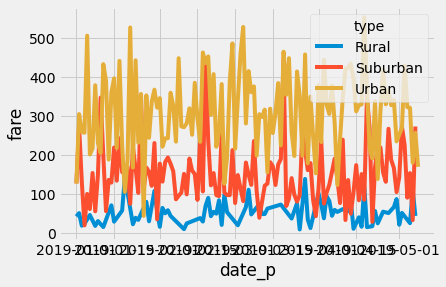

In [218]:
# from homework help on Zoom
sns.lineplot(data=ha, x="date_p", y="fare", hue="type")
plt.show()

In [219]:
#2. Using groupby() to create a new DataFrame showing the sum of the fares 
# for each date where the indices are the city type and date.
df2 = pyber_data_df.groupby(["date", "type"]).fare.sum()
df2 = pd.DataFrame(df2)
df2

,,fare
date,type,
1/1/19 0:08,Urban,37.91
1/1/19 0:46,Suburban,47.74
1/1/19 12:32,Suburban,25.56
1/1/19 14:40,Urban,5.42
1/1/19 14:42,Urban,12.31
...,...,...
5/8/19 1:54,Urban,32.69
5/8/19 2:31,Urban,41.33
5/8/19 4:20,Urban,21.99


In [220]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index() -- would not work before
df2.reset_index(inplace=True)
df2

,date,type,fare
0,1/1/19 0:08,Urban,37.91
1,1/1/19 0:46,Suburban,47.74
2,1/1/19 12:32,Suburban,25.56
3,1/1/19 14:40,Urban,5.42
4,1/1/19 14:42,Urban,12.31
...,...,...,...
2359,5/8/19 1:54,Urban,32.69
2360,5/8/19 2:31,Urban,41.33
2361,5/8/19 4:20,Urban,21.99
2362,5/8/19 4:39,Urban,18.45


In [221]:
# df2 = df2.reset_index

In [222]:
df2.columns

Index(['date', 'type', 'fare'], dtype='object')

In [223]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
df2 = df2.pivot(index='date', columns='type', values='fare')
df2

type,Rural,Suburban,Urban
date,,,
1/1/19 0:08,NaN,NaN,37.91
1/1/19 0:46,NaN,47.74,NaN
1/1/19 12:32,NaN,25.56,NaN
1/1/19 14:40,NaN,NaN,5.42
1/1/19 14:42,NaN,NaN,12.31
...,...,...,...
5/8/19 1:54,NaN,NaN,32.69
5/8/19 2:31,NaN,NaN,41.33
5/8/19 4:20,NaN,NaN,21.99


In [224]:
# works now? previously only Unix epoch for type -- sns made the difference or the x() fix?
df2.index = pd.to_datetime(df2.index)
df2.head()

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:00,NaN,NaN,37.91
2019-01-01 00:46:00,NaN,47.74,NaN
2019-01-01 12:32:00,NaN,25.56,NaN
2019-01-01 14:40:00,NaN,NaN,5.42
2019-01-01 14:42:00,NaN,NaN,12.31


In [227]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
# pink warnings are okay
# 4/28 in module vs 4/29 in directions
df2 = df2.loc['2019-01-01':'2019-04-28',:]
df2.tail()

/var/folders/d3/q0x6n9gx1x90l1rw65sslgv80000gn/T/ipykernel_1108/3813543324.py:2: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  df2 = df2.loc['2019-01-01':'2019-04-28',:]


type,Rural,Suburban,Urban
date,,,
2019-04-09 20:55:00,NaN,NaN,24.99
2019-04-09 21:41:00,NaN,NaN,15.96
2019-04-09 08:10:00,NaN,NaN,39.36
2019-04-09 08:47:00,NaN,NaN,4.95
2019-04-09 09:17:00,NaN,NaN,20.31


In [228]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
df2.index = pd.to_datetime(df2.index)
type(df2.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [230]:
# 7. Check that the datatype for the index is datetime using df.info()
# And now this produces the data missing earlier
df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2182 entries, 2019-01-01 00:08:00 to 2019-04-09 09:17:00
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  570 non-null    float64
 2   Urban     1501 non-null   float64
dtypes: float64(3)
memory usage: 68.2 KB


In [233]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
# also now working with data showing, not just header
df3 = df2.resample("W").sum()
df3

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


In [234]:
# 8.2? Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')



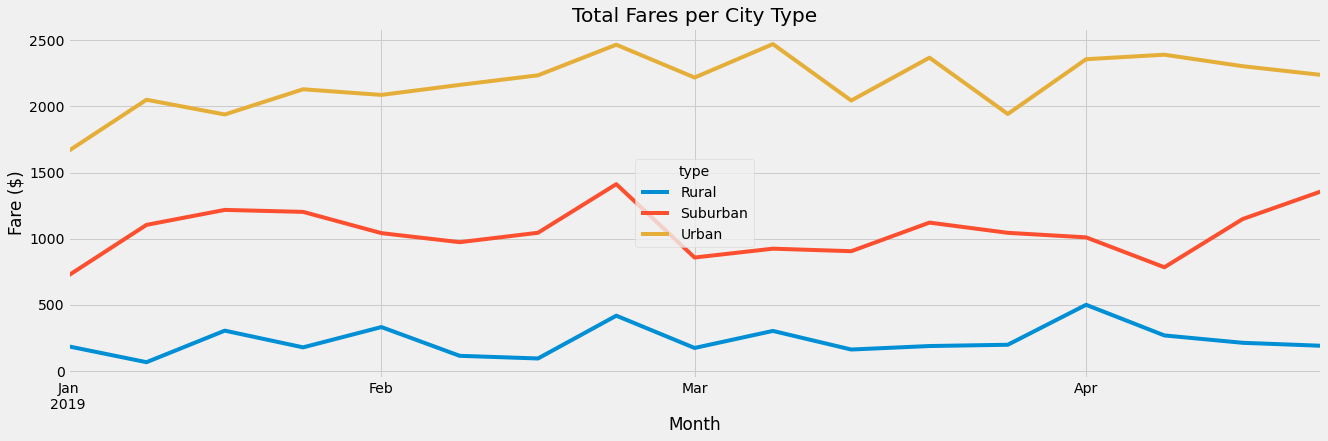

In [235]:
df3.plot(kind="line", figsize=(20,6))
plt.title("Total Fares per City Type")
plt.ylabel("Fare ($)")
plt.xlabel("Month")
plt.show()